Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Load and preprocess the dataset

In [2]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 92s 1us/step


Visualize the dataset

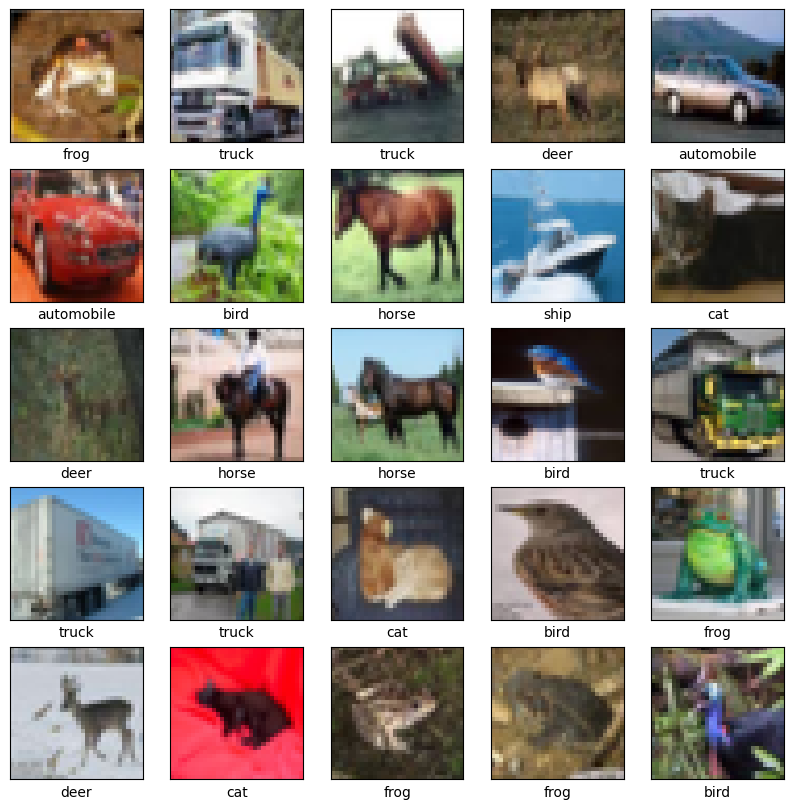

In [3]:
# Plot the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


Build the CNN model

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


c:\Users\energ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Train the model

In [6]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3440 - loss: 1.7727 - val_accuracy: 0.5460 - val_loss: 1.2627
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5665 - loss: 1.2066 - val_accuracy: 0.6004 - val_loss: 1.1205
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6391 - loss: 1.0258 - val_accuracy: 0.6366 - val_loss: 1.0266
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6785 - loss: 0.9177 - val_accuracy: 0.6575 - val_loss: 0.9880
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7023 - loss: 0.8483 - val_accuracy: 0.6873 - val_loss: 0.9060
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7239 - loss: 0.7878 - val_accuracy: 0.6857 - val_loss: 0.9006
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7421 - loss: 0.7394 - val_accuracy: 0.6929 - val_loss: 0.8991
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7556 -

Evaluate the model

In [7]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy:", test_acc)


313/313 - 1s - 4ms/step - accuracy: 0.6964 - loss: 0.9187

Test accuracy: 0.696399986743927


Plot training and validation accuracy and loss

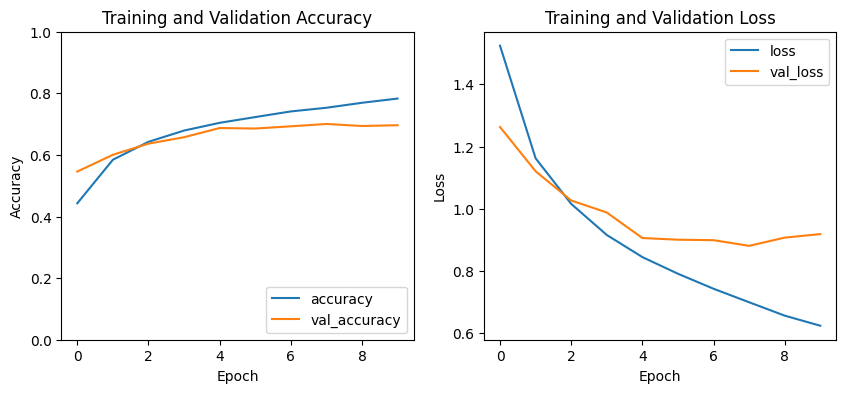

In [8]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


Make Predictions and Visualize Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


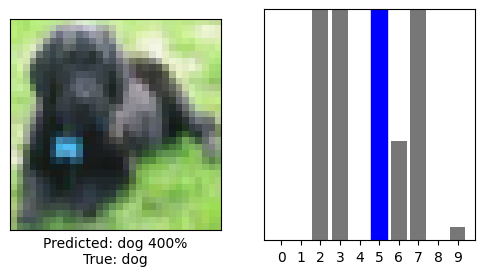

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to plot the image and its predicted label
def plot_image(predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[0], img
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    plt.xlabel(f"Predicted: {class_names[predicted_label]} {100*np.max(predictions_array):2.0f}%\nTrue: {class_names[true_label]}")

# Function to plot the value array
def plot_value_array(predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[0]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Predict and plot the results with a random image
def predict_and_plot_random(model, test_images, test_labels):
    index = random.randint(0, len(test_images) - 1)
    img = test_images[index]
    true_label = test_labels[index]

    # Add the image to a batch where it's the only member.
    img = np.expand_dims(img, 0)

    predictions = model.predict(img)

    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(predictions[0], true_label, test_images[index])
    plt.subplot(1,2,2)
    plot_value_array(predictions[0], true_label)
    plt.show()

# Test the function with a random example
predict_and_plot_random(model, test_images, test_labels)
